In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hwutils as util

%matplotlib inline

In [2]:
import importlib
importlib.reload(util)

<module 'hwutils' from '/home/bogdan/Projects/cs1156x/hwutils.py'>

### Regularization with Weight Decay

In [3]:
def prepare_data(filepath):
    raw = pd.read_csv(filepath, delimiter='\s+', header=None).as_matrix()
    X = raw[:, :2]
    y = raw[:, 2]
    return X, y

In [4]:
train_data_path = './data/in.dta'
test_data_path = './data/out.dta'

X_train, y_train = prepare_data(train_data_path)
X_test, y_test = prepare_data(test_data_path)

In [9]:
#plt.scatter(*X_train.T, c=y_train)

In [5]:
def transform(X):
    Z = np.ones(shape=(X.shape[0], 8))
    Z[:, 1:2+1] = X
    Z[:, 3:4+1] = X ** 2
    Z[:, 5] = np.multiply(*X.T)
    Z[:, 6] = np.abs(X[:, 0] - X[:, 1])
    Z[:, 7] = np.abs(np.sum(X, axis=1))
    
    return Z

In [6]:
Z_train = transform(X_train)
Z_test = transform(X_test)

In [7]:
def run_solution2(ks):
    result = []
    cols = ['k', 'In-sample error', 'Out-of-sample error']
    for k in ks:
        w_lr = util.fit_linear_regression(Z_train, y_train, lambda_=0 if not k else 10**k)
        Ein = 1 - util.calculate_accuracy(Z_train, y_train, w_lr)
        Eout = 1 - util.calculate_accuracy(Z_test, y_test, w_lr)
        result.append({cols[0]: k, cols[1]: round(Ein, 2), cols[2]: round(Eout, 2)})        
    return pd.DataFrame(result)[cols]

**Problems 2-4**

In [8]:
run_solution2(ks=[None, -3, 3])

,k,In-sample error,Out-of-sample error
0,NaN,0.03,0.08
1,-3.0,0.03,0.08
2,3.0,0.37,0.44


**Problem 5**

In [43]:
(run_solution2(ks=[2, 1, 0, -1, -2])
 .sort_values('Out-of-sample error', ascending=True)
 .head(1))

,k,In-sample error,Out-of-sample error
3,-1,0.03,0.06


**Problem 5**

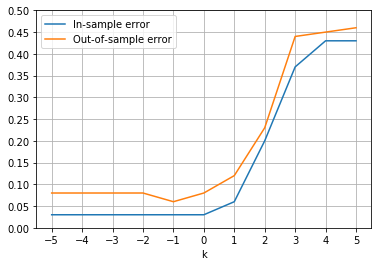

0.059999999999999998

In [41]:
ks = range(-5, 5+1)
result = run_solution2(ks)

yticks = np.linspace(0, 0.5, num=11)
(result
 .set_index('k')
 .plot(grid=True, xticks=ks, yticks=yticks))
plt.show()

result['Out-of-sample error'].min()